In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [6]:
data_train=pd.read_csv('/content/train_dataset.csv')
data_train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [7]:
data_test=pd.read_csv('/content/test_dataset.csv')
data_test.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3870,41,C,Placebo,22553,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,3462,1811,C,D-penicillamine,16223,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,1632,954,C,D-penicillamine,27100,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,722,1969,D,Placebo,17039,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,1000,2721,D,D-penicillamine,17738,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

In [9]:
data_test.shape

(3200, 19)

In [10]:
data_train.shape

(6800, 20)

In [11]:
#missing values calumns wise
data_train.isnull().sum(axis=0).sort_values()

ID                  0
Albumin             0
Bilirubin           0
Sex                 0
Edema               0
Status              0
N_Days              0
Age                 0
Stage               0
Prothrombin       155
Platelets         338
Drug             2025
SGOT             2102
Copper           2156
Ascites          2246
Hepatomegaly     2427
Alk_Phos         2498
Spiders          2590
Tryglicerides    2812
Cholesterol      3101
dtype: int64

In [12]:
#missing values row wise
data_train.isnull().sum(axis=1).sort_values()

0       0
3242    0
803     0
791     0
4502    0
       ..
6644    8
5540    8
967     8
4188    9
2118    9
Length: 6800, dtype: int64

In [13]:
# total no of NAN values in dataset
data_train.isnull().sum().sum()

22450

In [14]:
data_train.isnull().mean()*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             29.779412
Age               0.000000
Sex               0.000000
Ascites          33.029412
Hepatomegaly     35.691176
Spiders          38.088235
Edema             0.000000
Bilirubin         0.000000
Cholesterol      45.602941
Albumin           0.000000
Copper           31.705882
Alk_Phos         36.735294
SGOT             30.911765
Tryglicerides    41.352941
Platelets         4.970588
Prothrombin       2.279412
Stage             0.000000
dtype: float64

In [15]:
# we use forward data for removing Nan value data
new_data_train=data_train.fillna(method='ffill')
new_data_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,N,N,Y,N,0.3,279.0,2.96,84.0,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,D-penicillamine,27957,F,N,N,Y,N,0.3,328.0,2.64,4.0,1835.4,26.35,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,N,Y,Y,N,0.3,302.0,2.02,49.0,1835.4,26.35,116.0,194.0,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,N,Y,Y,N,0.5,344.0,3.11,91.0,1835.4,104.56,116.0,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,N,N,N,N,0.9,360.0,2.43,274.0,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,360.0,2.99,43.0,3444.4,131.59,238.0,399.0,10.6,4.0
6797,4082,584,C,Placebo,24102,F,N,Y,N,N,0.3,218.0,2.79,43.0,3444.4,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,Y,Y,N,0.3,218.0,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [16]:
new_data_train.isnull().sum(axis=0).sort_values()# we can check the data having Nan data

ID               0
Platelets        0
Tryglicerides    0
SGOT             0
Alk_Phos         0
Copper           0
Albumin          0
Cholesterol      0
Bilirubin        0
Edema            0
Spiders          0
Hepatomegaly     0
Ascites          0
Sex              0
Age              0
Drug             0
Status           0
N_Days           0
Prothrombin      0
Stage            0
dtype: int64

In [17]:
new_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           6800 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        6800 non-null   object 
 7   Hepatomegaly   6800 non-null   object 
 8   Spiders        6800 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    6800 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         6800 non-null   float64
 14  Alk_Phos       6800 non-null   float64
 15  SGOT           6800 non-null   float64
 16  Tryglicerides  6800 non-null   float64
 17  Platelets      6800 non-null   float64
 18  Prothrom

In [18]:
# we convert the categorical data into numerical data
my_data=pd.get_dummies(new_data_train,columns=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'],drop_first=True)
my_data.head()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,7135,1654,19581,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,...,4.0,1,0,0,0,0,0,1,0,0
1,7326,41,22880,0.3,279.0,2.96,84.0,1835.4,26.35,131.0,...,1.0,0,0,0,0,0,0,1,0,0
2,7254,297,27957,0.3,328.0,2.64,4.0,1835.4,26.35,116.0,...,3.0,0,1,0,0,0,0,1,0,0
3,3135,1872,21111,0.3,302.0,2.02,49.0,1835.4,26.35,116.0,...,4.0,0,0,0,0,0,1,1,0,0
4,2483,939,18061,0.5,344.0,3.11,91.0,1835.4,104.56,116.0,...,2.0,1,0,0,0,0,1,1,0,0


In [19]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6800 non-null   int64  
 1   N_Days          6800 non-null   int64  
 2   Age             6800 non-null   int64  
 3   Bilirubin       6800 non-null   float64
 4   Cholesterol     6800 non-null   float64
 5   Albumin         6800 non-null   float64
 6   Copper          6800 non-null   float64
 7   Alk_Phos        6800 non-null   float64
 8   SGOT            6800 non-null   float64
 9   Tryglicerides   6800 non-null   float64
 10  Platelets       6800 non-null   float64
 11  Prothrombin     6800 non-null   float64
 12  Stage           6800 non-null   float64
 13  Status_CL       6800 non-null   uint8  
 14  Status_D        6800 non-null   uint8  
 15  Drug_Placebo    6800 non-null   uint8  
 16  Sex_M           6800 non-null   uint8  
 17  Ascites_Y       6800 non-null   u

In [20]:
my_data.drop(columns=['ID'])



,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,1654,19581,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,...,4.0,1,0,0,0,0,0,1,0,0
1,41,22880,0.3,279.0,2.96,84.0,1835.4,26.35,131.0,308.0,...,1.0,0,0,0,0,0,0,1,0,0
2,297,27957,0.3,328.0,2.64,4.0,1835.4,26.35,116.0,194.0,...,3.0,0,1,0,0,0,0,1,0,0
3,1872,21111,0.3,302.0,2.02,49.0,1835.4,26.35,116.0,194.0,...,4.0,0,0,0,0,0,1,1,0,0
4,939,18061,0.5,344.0,3.11,91.0,1835.4,104.56,116.0,306.0,...,2.0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,20909,0.9,360.0,2.43,274.0,3444.4,131.59,130.0,314.0,...,1.0,0,0,1,1,0,0,0,0,0
6796,2955,28650,0.3,360.0,2.99,43.0,3444.4,131.59,238.0,399.0,...,4.0,0,0,1,0,1,0,0,0,0
6797,584,24102,0.3,218.0,2.79,43.0,3444.4,26.35,123.0,103.0,...,1.0,0,0,1,0,0,1,0,0,0
6798,1426,19791,0.3,218.0,1.96,12.0,289.0,72.95,134.0,354.0,...,2.0,1,0,0,0,0,1,1,0,0


<Axes: >

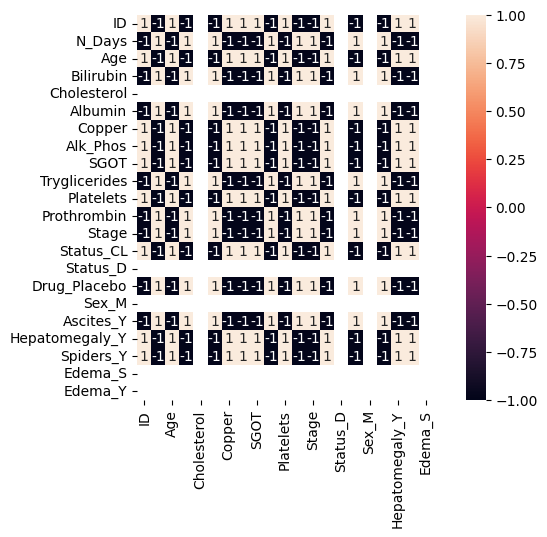

In [21]:
plt.figure(figsize=(5,5))
snr.heatmap(my_data[4:6].corr(),annot=True)

# we visualization on categorical data

<Axes: xlabel='Stage', ylabel='count'>

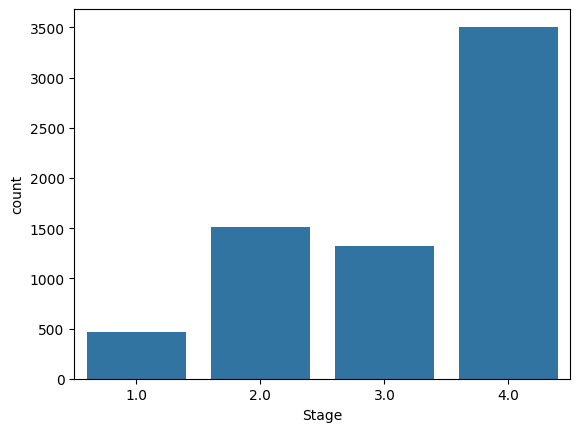

In [22]:
snr.countplot(x='Stage',data=data_train)

<Axes: xlabel='Status', ylabel='count'>

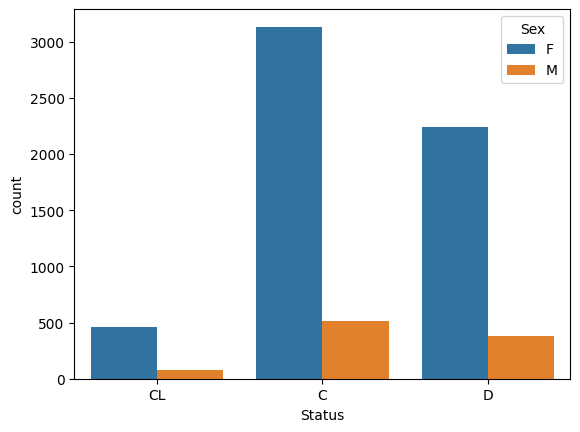

In [23]:
snr.countplot(data=data_train, x="Status",hue='Sex')

<Axes: xlabel='Status', ylabel='count'>

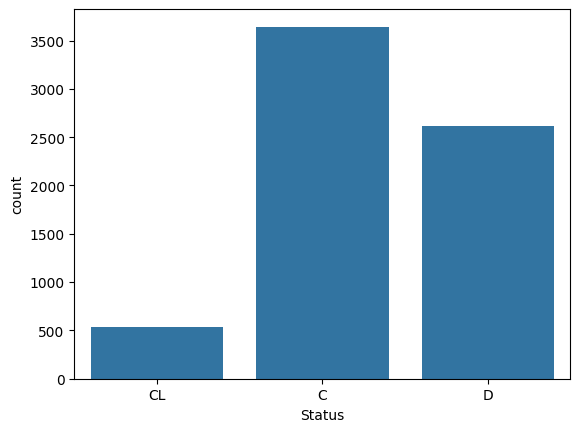

In [24]:
snr.countplot(data=data_train, x="Status")

<Axes: xlabel='Drug', ylabel='count'>

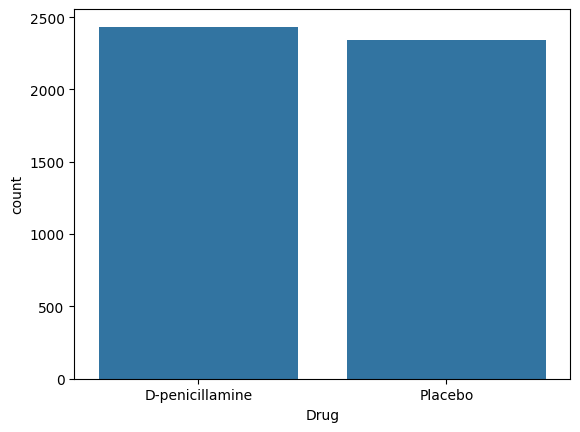

In [25]:
snr.countplot(data=data_train, x="Drug")

<Axes: xlabel='Ascites', ylabel='count'>

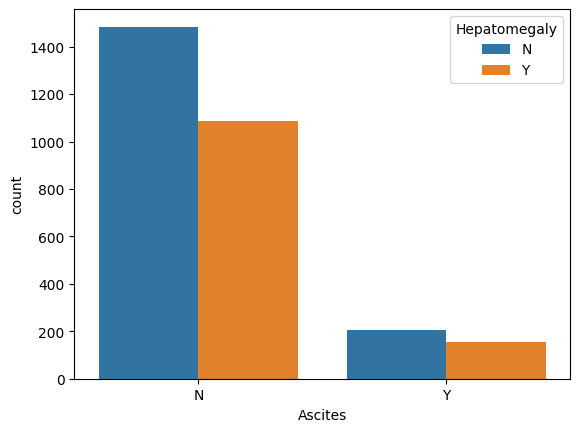

In [26]:
snr.countplot(data=data_train, x="Ascites",hue='Hepatomegaly')

<Axes: xlabel='Spiders', ylabel='count'>

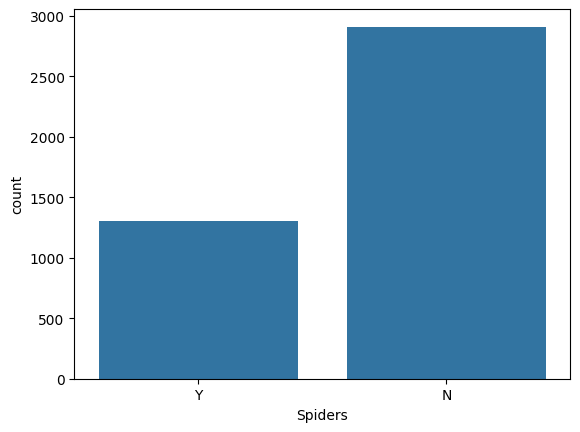

In [27]:
snr.countplot(data=data_train,x='Spiders')

<Axes: xlabel='Edema', ylabel='count'>

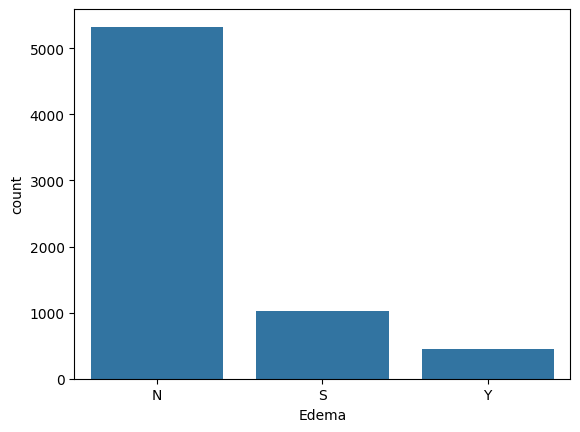

In [28]:
snr.countplot(data=data_train,x='Edema')

we analysis the data on numerical value

<Axes: >

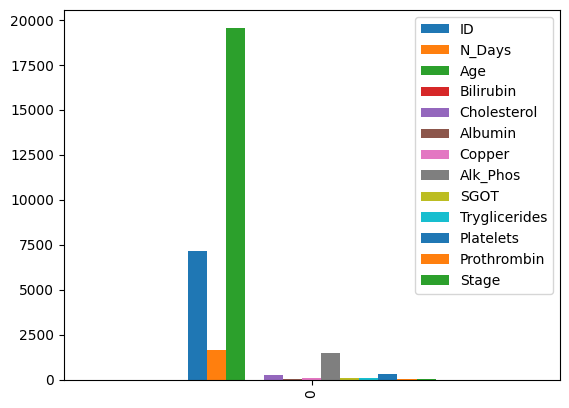

In [29]:
data_train.iloc[0:1].plot(kind='bar')

<Axes: ylabel='Frequency'>

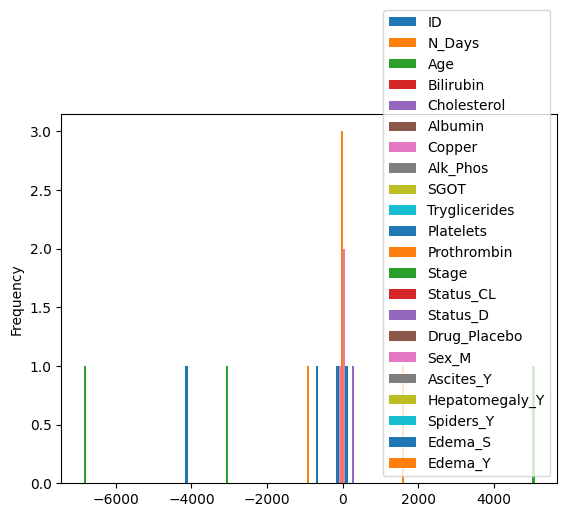

In [30]:
my_data[1:5].diff().plot(kind='hist',bins=200)

<Axes: xlabel='Bilirubin', ylabel='Age'>

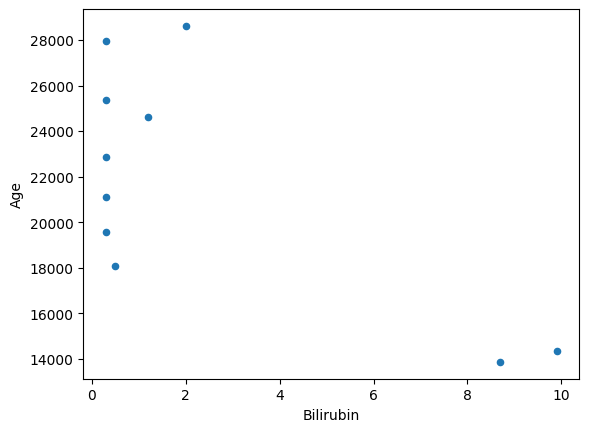

In [31]:
my_data.iloc[0:10].plot.scatter(x='Bilirubin',y='Age')

<Axes: xlabel='Bilirubin', ylabel='Age'>

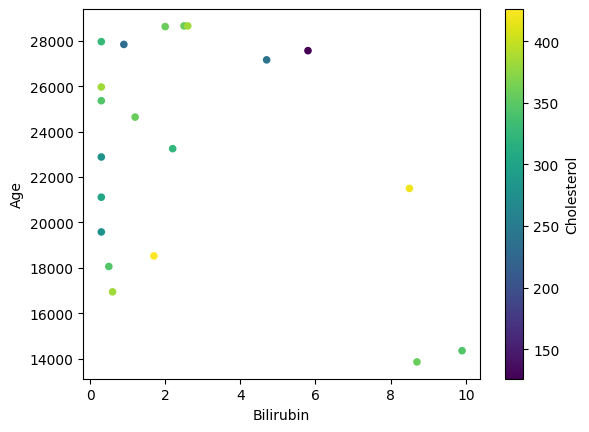

In [32]:
my_data.iloc[0:20].plot.scatter(x='Bilirubin',y='Age',c='Cholesterol')

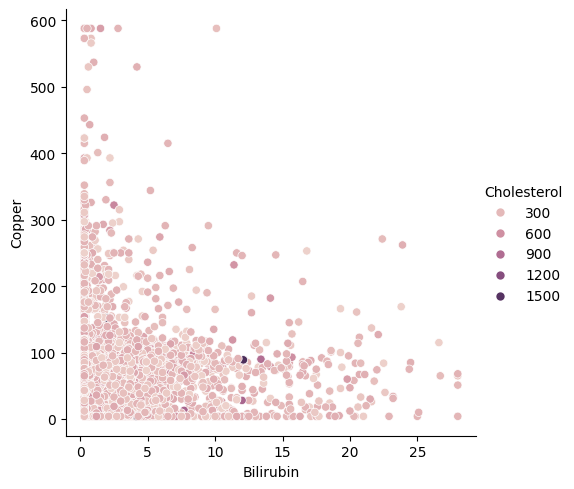

In [33]:
snr.relplot(x='Bilirubin',y='Copper',hue='Cholesterol',data=my_data)

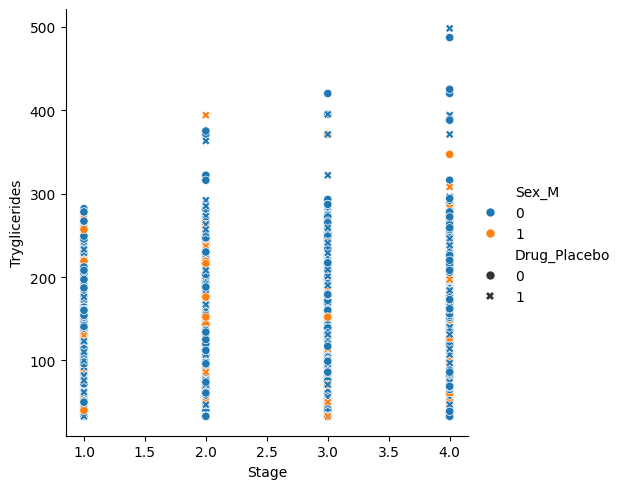

In [34]:
snr.relplot(x='Stage',y='Tryglicerides',hue='Sex_M',style='Drug_Placebo',data=my_data)

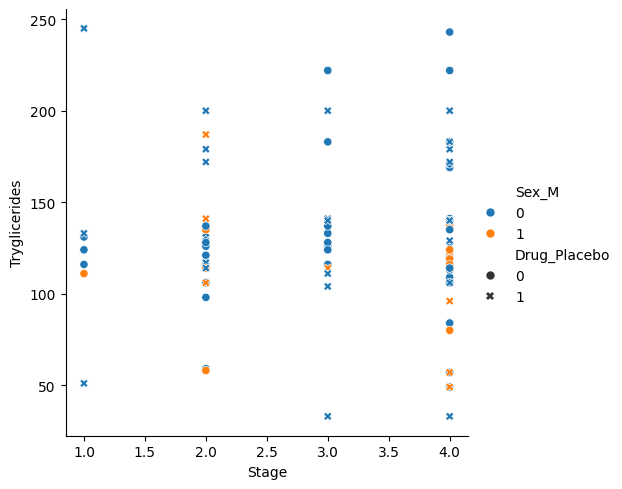

In [35]:
snr.relplot(x='Stage',y='Tryglicerides',hue='Sex_M',style='Drug_Placebo',data=my_data.iloc[0:110])

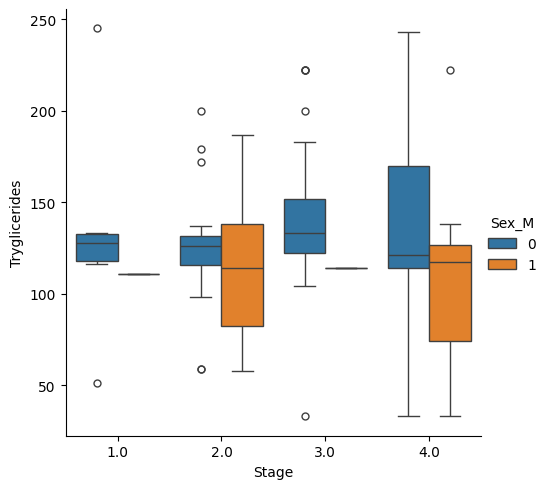

In [36]:
snr.catplot(x='Stage',y='Tryglicerides',hue='Sex_M',data=my_data.iloc[0:110],kind='box')

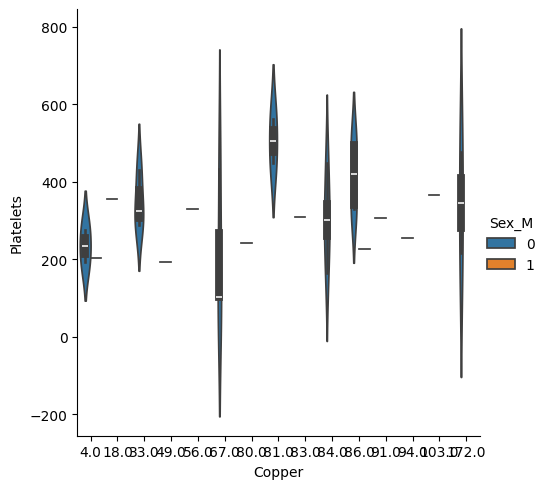

In [37]:
snr.catplot(y='Platelets',x='Copper',hue='Sex_M',data=my_data.iloc[0:30],kind='violin')

In [38]:
#Divide the data into dependent and independent set
x=my_data.drop(columns=['Stage'])
y=my_data['Stage']

In [39]:
#spilting the data into training and testing set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [40]:
# by using knn for machine learning model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #where k=5

In [41]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_predict=knn.predict(x_test)

In [43]:
#checking the accuracy with help of confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
ac=accuracy_score(y_test,y_predict)

In [44]:
print(cm)
print(ac)

[[  5  20  21  41]
 [ 17  66  62 165]
 [ 18  60  94  74]
 [ 28 139 128 422]]
0.43161764705882355


#Now,we use another method for finding the accuracy


In [45]:
# by using Decision tree for machine learning model
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [46]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
tree_predict=tree.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,tree_predict)
ac=accuracy_score(y_test,tree_predict)

In [49]:
print(cm)
print(ac)

[[  6  24  24  33]
 [ 21  92  46 151]
 [ 24  47  84  91]
 [ 46 174 123 374]]
0.4088235294117647


In [50]:
#Now,we use another method for finding the accuracy

In [51]:
from sklearn import svm
clt=svm.SVC(kernel='linear')

In [ ]:
clt.fit(x_train,y_train)

In [ ]:
predictions=clt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)
print(ac)

#Now,we use testing data set for predict the value

In [ ]:
data_test=pd.read_csv('/content/test_dataset.csv')
data_test.head()


In [ ]:
data_test.info()

In [ ]:
#missing values calumns wise
data_test.isnull().sum(axis=0).sort_values()

In [ ]:
# we use forward data for removing Nan value data
new_data_test=data_test.fillna(method='bfill')
new_data_test

In [ ]:
new_data_test.isnull().sum(axis=0).sort_values()# we can check the data having Nan data

In [ ]:
my_data_test=new_data_test.fillna(0)
my_data_test



In [ ]:
my_data_test.isnull().sum(axis=0).sort_values()# we can check the data having Nan data

In [ ]:
# we convert the categorical data into numerical data
df=pd.get_dummies(my_data_test,columns=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'],drop_first=True)
df.head()

In [ ]:
my_data.info()

In [ ]:
#now cleaning the data then use for prediction
#now spilting into x1 test and x1_train set

In [ ]:
#spilting the data into training and testing set.
from sklearn.model_selection import train_test_split
x1_train, x1_test = train_test_split(df, test_size=0.1, random_state=0)

In [ ]:
from sklearn import svm
clt=svm.SVC(kernel='linear')

In [ ]:
ty_predict=knn.predict(x1_test)

In [ ]:
clt_predict=clt.predict(x1_test)

In [ ]:
my_tree_predict=tree.predict(x1_test)